## 深度学习介绍
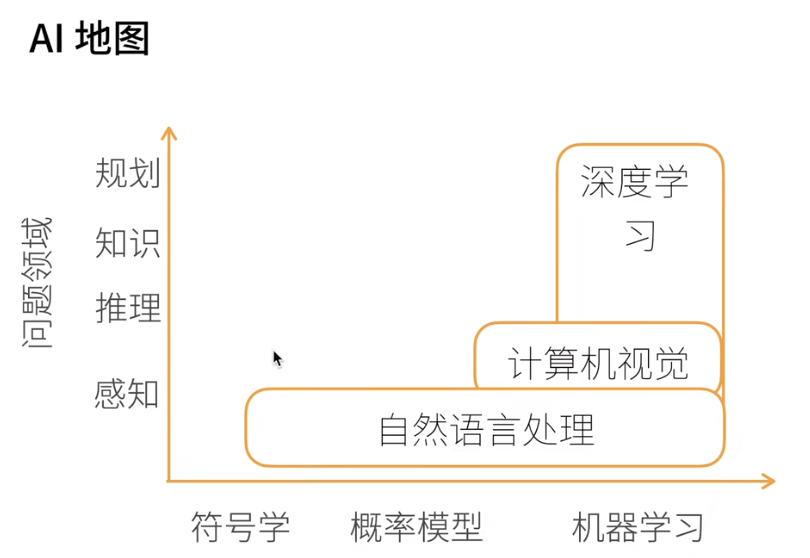
<style>
    img[alt="深度学习介绍.png"]{
        height:240px;
        
    }
</style>

感知：能看到物体（人几秒能反应的东西）（机器翻译）  
推理：基于看到的东西，想象未来可能会发生什么  
知识：根据看到的数据现象形成知识  
规划：知道所有东西后，可以进行长远的规划  

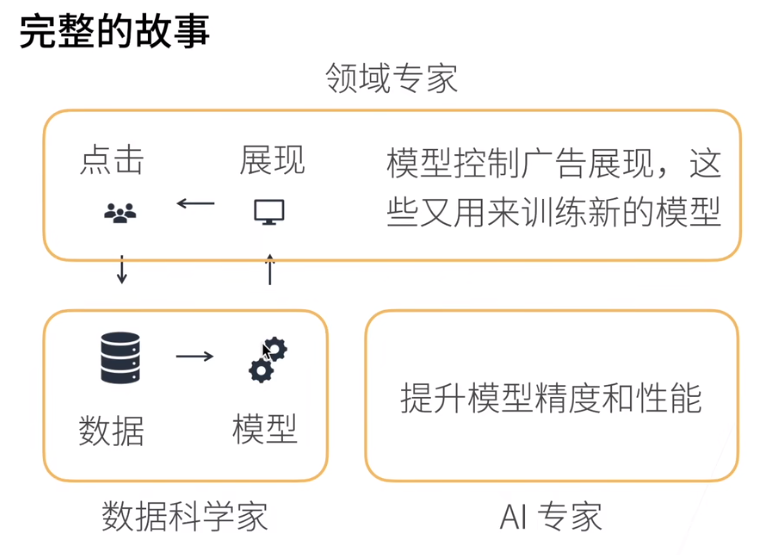
<style>
    img[alt="深度学习介绍2.png"]{
        height:240px;
        
    }
</style>

领域专家：例如做农业上的物体识别，看果园今年收成如何，利用无人机拍图片。农业相关人士，什么树要长多少叶子是比较好的。--提需求，甲方 
数据科学家：将领域专家的问题需求翻译成机器学习任务，训模型。--乙方

## 数据操作

In [ ]:
import torch
x = torch.arange(12)
x.shape
x.numel()
X = x.reshape(3, 4)
torch.zeros((2, 3, 4))
torch.ones((2, 3, 4))
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

x = torch.tensor([1.0, 2, 4, 8]) # 一个有浮点数，所有都是浮点数
y = torch.tensor([2,2,2,2])
x + y, x - y, x * y, x / y, x ** y
torch.exp(x)

# 可以把多个张量连结在一起
X = torch.arange(12, dtype=torch.float32).reshape((3, 4))
Y = torch.tensor([[2.0,1,4,3],[1,2,3,4],[4,3,2,1]])
torch.cat((X,Y),dim=0), torch.cat((X,Y),dim=1)

# 通过逻辑运算符构建二元张量
X == Y 

# 对张量中所有元素求和，产生一个只有一个元素的张量
X.sum()
 
# 即使形状不同，仍然可以通过广播机制执行按元素操作
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
a + b # (3,2)

# 用-1访问最后一个元素
X[-1], X[1:3]

# 可通过指定索引将元素写入矩阵
X[1,2]=9

# 为多个元素赋相同的值
X[0:2,:] = 12

# 一些操作可能会导致为新结果分配内存
before = id(Y)
Y = Y + X
id(Y) == before
# 执行原地操作
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y # 对Z的元素进行改写
print('id(Z):', id(Z))
# 如果在后续没有重复使用X，可以使用X[:] = X + Y 或 X += Y
before = id(X)
X += Y
id(X) == before

# 转化为numpy张量
A=X.numpy()
B=torch.tensor(A)
type(A), type(B)
# 将大小为1的张量转换为python标量
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

##  数据预处理
将原始数据读取进来

In [ ]:
# 创建一个人工数据集，并存储在csv（逗号分隔值）文件
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # 列名
    f.write('NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,NA,106000\n')  # NA表示未知
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')


In [ ]:
# 从csv文件加载原始数据集
# !pip install pandas
import pandas as pd
data = pd.read_csv(data_file)
print(data)
data  # html形式

In [ ]:
# 通过插值和删除，处理缺失的数据
# 插值
inputs, outputs = data.iloc[:,0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)

In [ ]:
# 对于inputs中的类别值或离散值，我们将NaN视为一个类别
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

In [ ]:
# 将inputs和outputs中的所有条目由数值类型转换为张量格式
import torch
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

## 线性代数
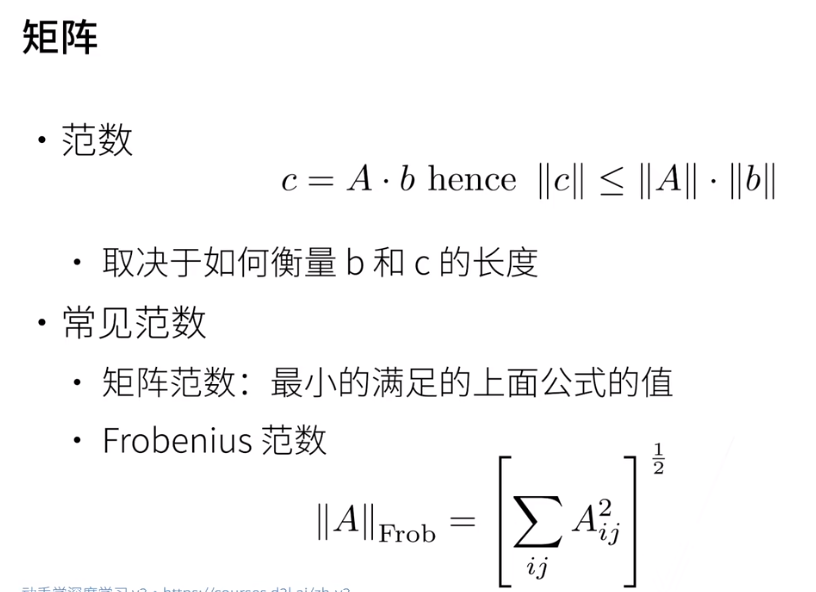
<style>
    img[alt="线性代数.png"]{
        height:340px;
        
    }
</style>

范数--长度  
一般用F范数

特殊矩阵：对称、反对称、正定、正交矩阵、置换矩阵  
特征向量和特征值  
特征向量：不被矩阵改变方向的向量  
对称矩阵总是可以找到特征向量  

In [ ]:
# 标量由只有一个元素的张量表示
import torch
x = torch.tensor([3.0])
y = torch.tensor([2.0])

x + y, x * y, x / y, x ** y

# 可将向量视为标量值组成的列表
x = torch.arange(4)

# 通过张量的索引访问任一元素
x[3]

# 张量的长度
len(x)

# 只有一个轴的张量，形状只有一个元素
x.shape

In [ ]:
# 通过指定两分量m和n，创建形状为mxn的矩阵
A = torch.arange(20).reshape(5,4)

# 矩阵的转置
A.T

# 对称矩阵等于其转置
B = torch.tensor([[1,2,3],[2,0,4],[3,4,5]])
B == B.T

In [ ]:
# 可以构建具有更多轴的数据结构
X = torch.arange(24).reshape(2,3,4)

# 给定任何相同形状的两个张量，按元素二元运算结果都是相同形状的张量
A = torch.arange(20, dtype = torch.float32).reshape(5,4)
B = A.clone()  # 通过分配新内存，将A的一个副本分配给B
A, A + B

In [ ]:
# 两矩阵按元素乘法
A * B

a = 2
X = torch.arange(24).reshape(2,3,4)
a + X, (a * X).shape

# 计算元素的和
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

# 任意形状张量的元素和
A.shape, A.sum()

In [ ]:
# 指定求和汇总张量的轴
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

A.sum(axis=[0,1])

In [ ]:
# 平均值
A.mean(), A.sum()/A.numel()

A.mean(axis=0), A.sum(axis=0)/A.shape[0]

# 计算总和或均值时保持轴数不变
sum_A = A.sum(axis=1, keepdims=True)
sum_A

# 通过广播将A除以sum_A
A / sum_A

# 某个轴计算A元素的累积总和
A.cumsum(axis=0)

In [ ]:
# 点积
y = torch.ones(4, dtype=torch.float32)
x, y, torch.dot(x,y)

# 通过按元素乘法，然后求和，表示点积
torch.sum(x * y)

# 矩阵向量积Ax是一个长度为m的列向量
A.shape, x.shape, torch.mv(A, x)

# 可以将矩阵-矩阵乘法AB看作执行m次矩阵-向量积，并将结果拼在一起，形成一个nxm矩阵
B = torch.ones(4, 3)
torch.mm(A, B)

In [ ]:
# L2范数 向量元素平方和的平方根
u = torch.tensor([3.0, -4.0])
torch.norm(u)

# L1范数 向量元素的绝对值之和
torch.abs(u).sum()

# 矩阵的F范数 矩阵元素平方和的平方根
torch.norm(torch.ones((4, 9)))

## 自动求导

In [ ]:
# 假设对y = 2xTx 关于列向量x求导
import torch

x = torch.arange(4.0)

In [ ]:
# 在计算y关于x的梯度之前，需要一个地方存储梯度
x.requires_gard_(True) # 等价于 x = torch.arange(4.0, requires_grad=True)
x.gard # 默认是None

# 计算y
y = 2 * torch.dot(x, x)

In [ ]:
# 通过调用反向传播函数，自动计算y关于x每个分量的梯度
y.backward()
x.grad

x.grad == 4 * x  ##########

In [ ]:
# 计算x的另一个函数
# 默认情况下pytorch会积累梯度，需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

In [ ]:
# 深度学习中，目的不是计算微分矩阵，而是批量中每个样本单独计算的偏导数之和
# 对非标量调用backward需传入一个gradient参数，
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

In [ ]:
# 将某些计算移动到记录的计算图之外
x.grad.zero_()
y = x*x
u = y.detach()
z = u*x

z.sum().backward()
x.grad == u

x.grad.zero_()
y.sum().backward()
x.grad == 2*x

In [ ]:
# 即使构建函数的计算图需要通过python控制流（条件、循环或函数调用），仍然可以计算变量的梯度
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(),requires_grad=True)
d = f(a)
d.backward()

a.grad == d/a